### 1. Imports

In [1]:
import os
import pandas as pd
from lcfunctions import download_alerce_lc, download_lasair_lc, display_lightcurve
from lcfunctions import lasair_clean, load_lasair_lc

### 2. Load dataframe of AAVSO CVs in ZTF

In [2]:
# Load dataset
df_ZTF_CVs = pd.read_csv('../processed_data/AAVSOCVsZTFxmatch_21032023_BTS_labelled.csv')
# test = pd.read_csv('../processed_data/AAVSOCVsZTFxmatch_21032023_BTS_manual_labelled.xlsm')

df_ZTF_CVs.CV_subtypes.value_counts()

dwarf_nova_SU_Uma    674
dwarf_nova_Z_Cam     179
nova_like_VY_Scl     135
dwarf_nova_U_Gem     132
nova_fast             16
nova_slow             14
nova_recurrent         9
nova_very_slow         7
Name: CV_subtypes, dtype: int64

In [3]:
# List of objects.
lst = df_ZTF_CVs.Xmatch_obj.to_list()
# Check length of objects list
print(f'Length of list of objects: {len(lst)}')

Length of list of objects: 5708


### Display light curves

In [302]:
date = '2023_03_25'

object = 'ZTF18aakynpt'

# Apply errorbars
error = False

if error == True:
        errCollasair1 = 'sigmapsf'
        errCollasair2 = 'dc_sigmag'
else:
    errCollasair1 = None
    errCollasair2 = None

objlist = df_ZTF_CVs[df_ZTF_CVs['Type'].str.contains('UGZ', na=False)]['Xmatch_obj'].iloc[0:10]
objtype = df_ZTF_CVs[df_ZTF_CVs['Type'].str.contains('UGZ', na=False)]['Type'].iloc[0:10]
i=0
for object, type in zip(objlist, objtype):
    print(i, object, type)
    
    # Display lasair difference magnitude and apparent magnitude light curves.
    lc_lasair = load_lasair_lc(object, path=f'../lightcurves_dataset/lasair_{date}')
    lc_lasair_appmag = lasair_clean(lc_lasair, limit=25, magerrlim=1)

    # print('Lasair difference magnitude')
    # display_lightcurve(lc_lasair,x='jd',y='magpsf',errorCol=errCollasair1)
    print('Lasair apparent magnitude')
    display_lightcurve(lc_lasair_appmag,x='jd',y='dc_mag',errorCol=errCollasair2)
    i+=1


0 ZTF18aabfaxr UGZ
Lasair apparent magnitude


1 ZTF17aaaewmi UGZ
Lasair apparent magnitude


2 ZTF19aawteif UGZ
Lasair apparent magnitude


3 ZTF19aaphtab UGZ
Lasair apparent magnitude


4 ZTF18aazfbnj UGZ
Lasair apparent magnitude


5 ZTF18abinavv UGZ
Lasair apparent magnitude


6 ZTF18abcgont UGZ
Lasair apparent magnitude


7 ZTF18aabhjxp UGZ
Lasair apparent magnitude


8 ZTF19aadkhsj UGZ
Lasair apparent magnitude


9 ZTF18aaakoxi UGZ
Lasair apparent magnitude


roll4.293472662138273
1.8363471146583565 0.1111667544282986 -0.16931245987699697 0.325823118833608


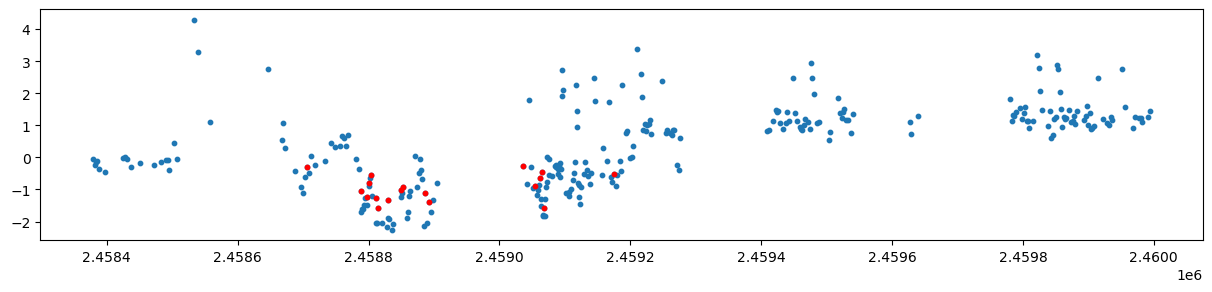

0.8216884646204896
0.563087847342004


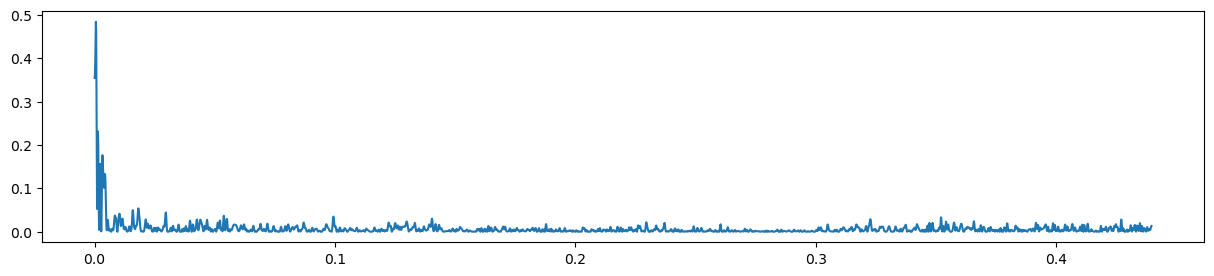

18 5.016189949607764e-26 0.0016407479031196616 6.545029116367017 1.169357358397562


roll2.6970602180004164
1.6205126517844486 0.08001618829471942 -0.3725523962969525 0.26796398548053196


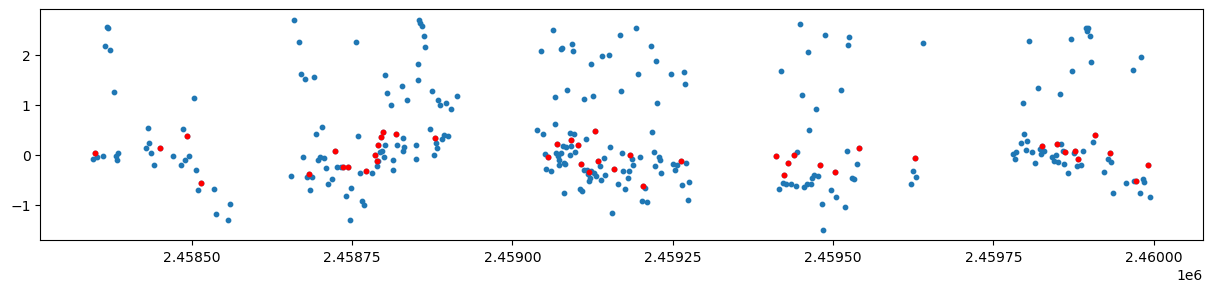

0.48119831098643573
0.252068616573359


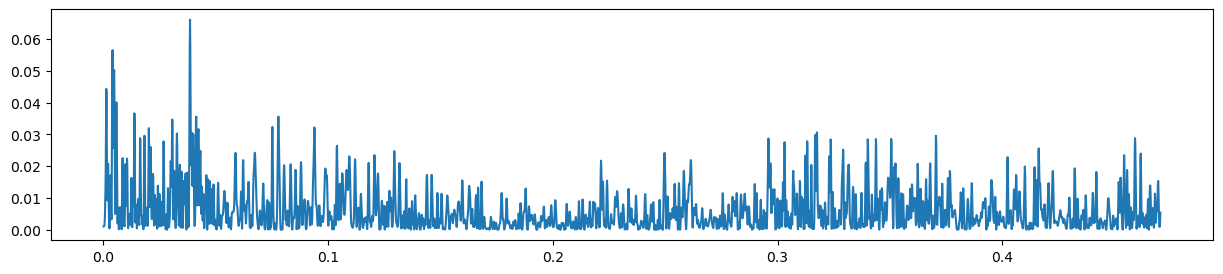

45 0.7079175604826752 -4.551926312024526e-05 4.193253546838623 0.8325537495698256


roll2.80216373555772
1.2483851817681613 0.08777160418832915 2.19803785622742 0.8259319535059491


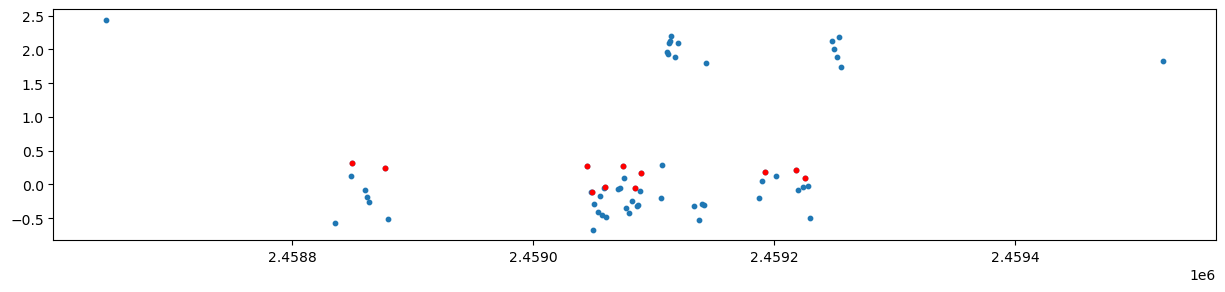

0.06301296571826473
0.44869205442611104


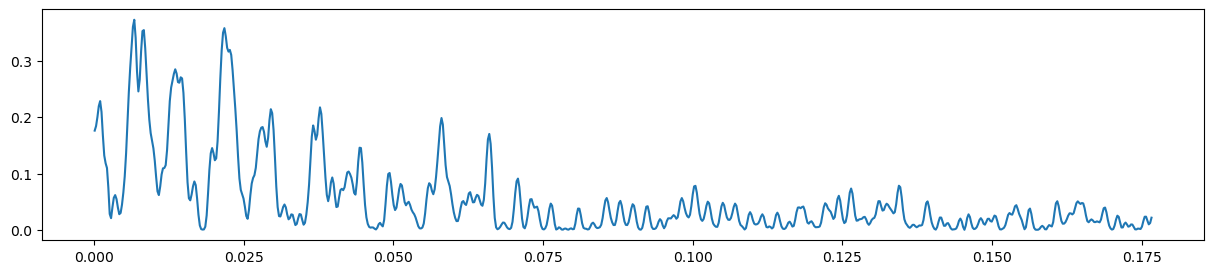

11 0.05718939467130863 0.0017186234446504827 3.110545704861984 0.8821815200557062


roll1.0914089486509368
1.4042857764499639 0.03932677101156187 0.10841435944875748 0.7179761503630598


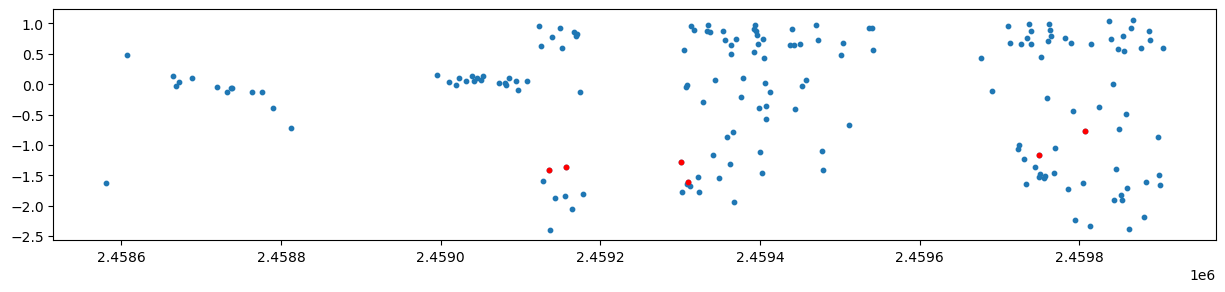

0.47070291952379506
0.49114019773824324


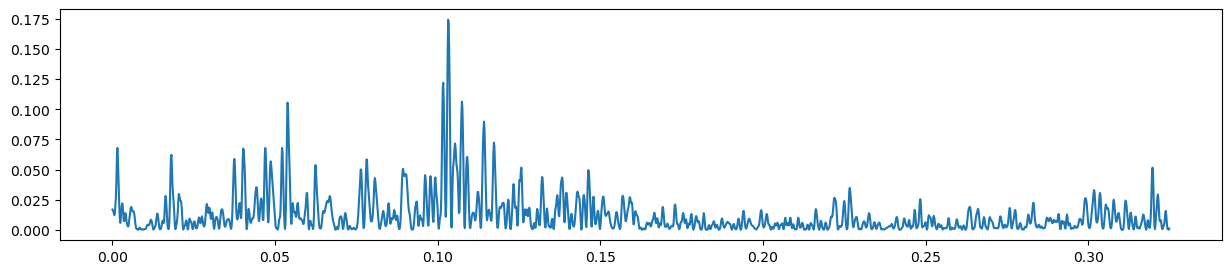

6 0.26019033274552106 -0.0002519315445747164 3.4571665763780963 1.4723312245320557


roll0.2935162186448359
1.5537127101918518 0.09050243247827207 0.12430521221395416 0.952291332343088


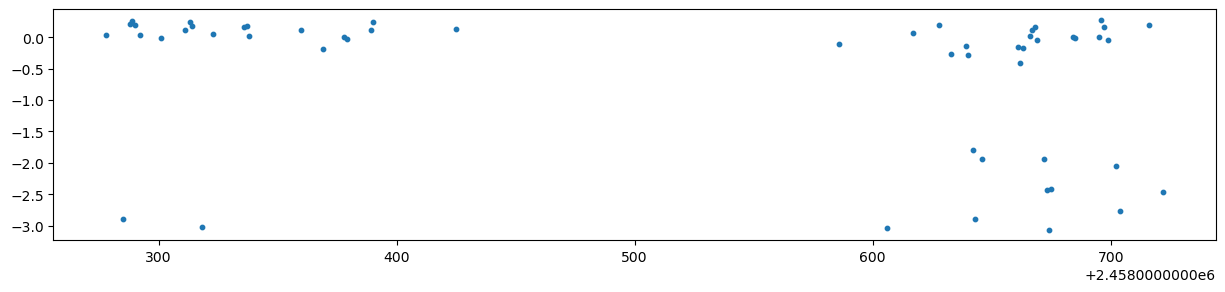

error


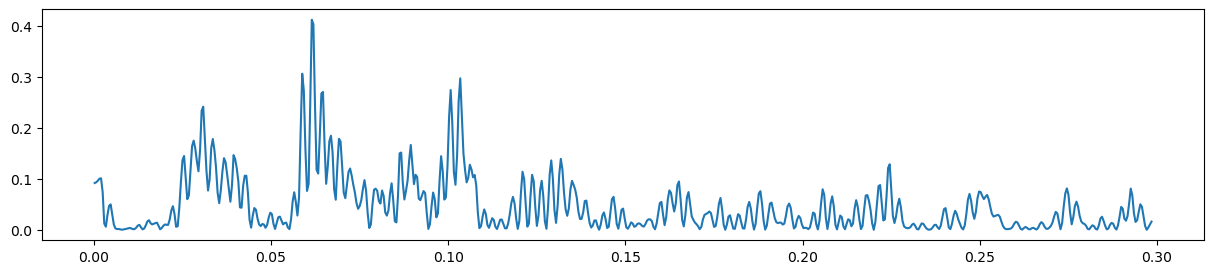

zero-size array to reduction operation maximum which has no identity


roll2.6418898380103997
1.4245771139130687 0.212540166208826 0.16043580130594925 0.3683513660782658


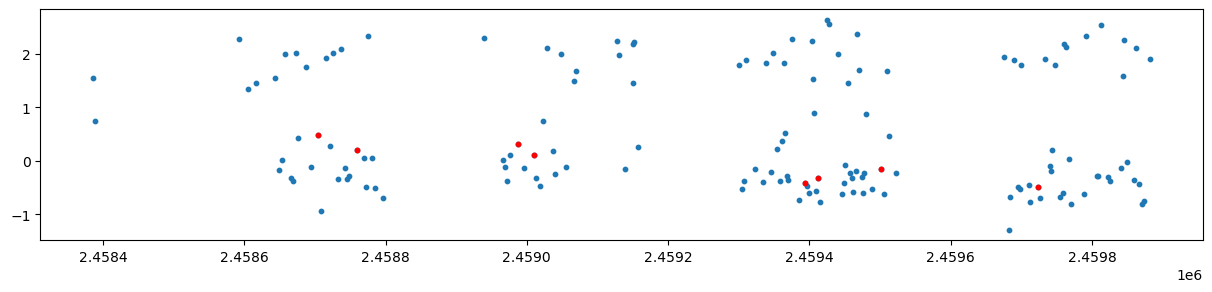

0.12272609416737446
0.12680431179270948


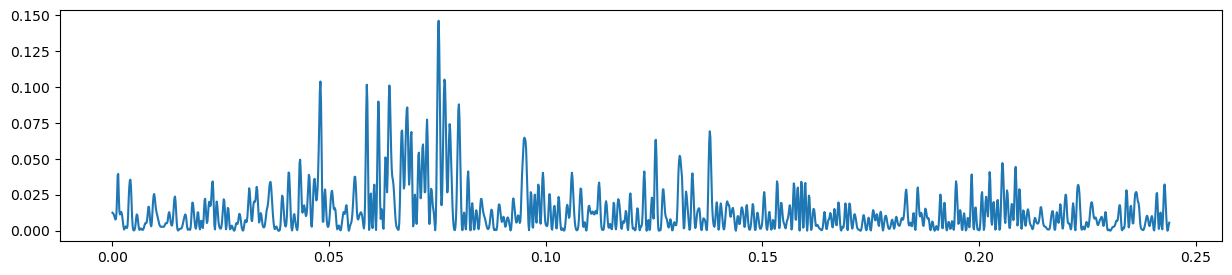

8 0.18241417904298218 -0.0003049813088154583 3.928535428467214 0.7058170256478178


roll0.3353669298357964
0.6804865399091662 0.03007008082700391 -0.03171246482465406 0.8382117346119639


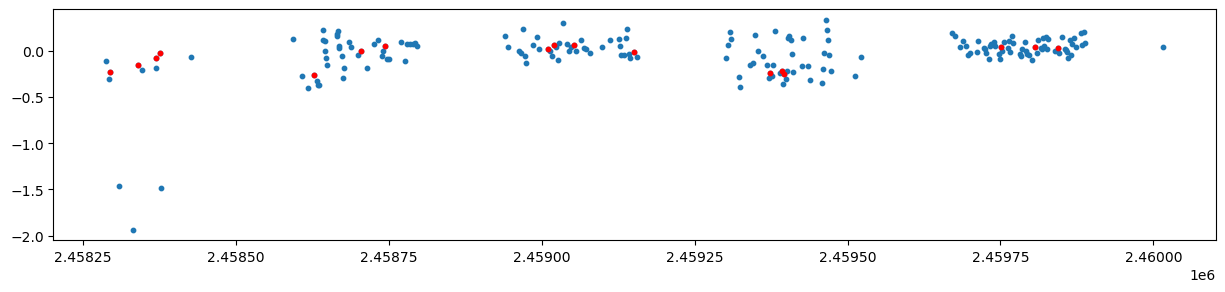

0.07535265649987366
0.4853703259307049


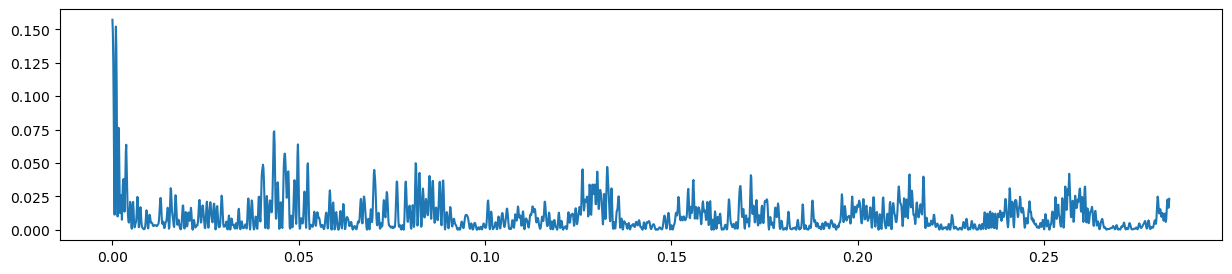

17 1.0409471457070723e-05 0.00016108646372088245 2.268887633970486 1.4561109777921146


roll1.3406652377851938
0.7818370424309824 0.04346592699040253 0.21679761461427133 0.4649877672145809


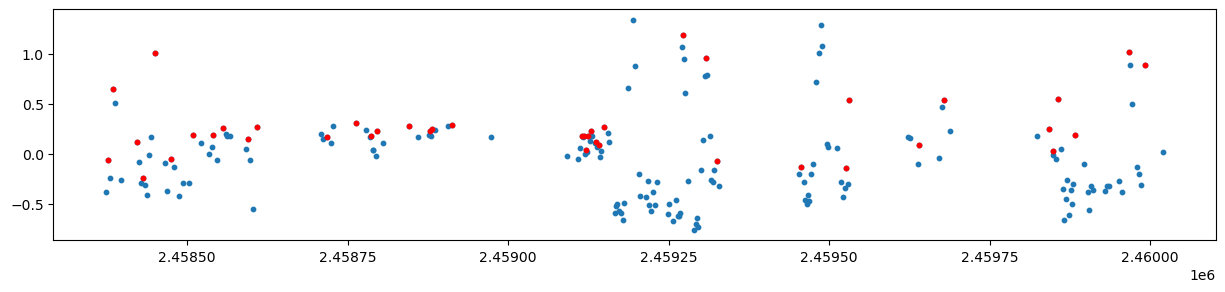

0.12454812276233033
0.1089652574186491


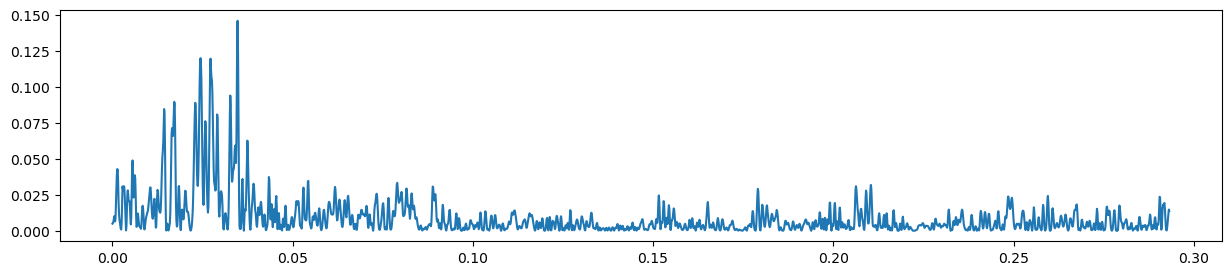

41 0.3487534156283769 -6.139026054784696e-05 2.1006391149596 1.8561445562380499


roll2.2370973270499803
1.3387014142091969 0.19118188226926078 1.831140703074912 0.8761448234944345


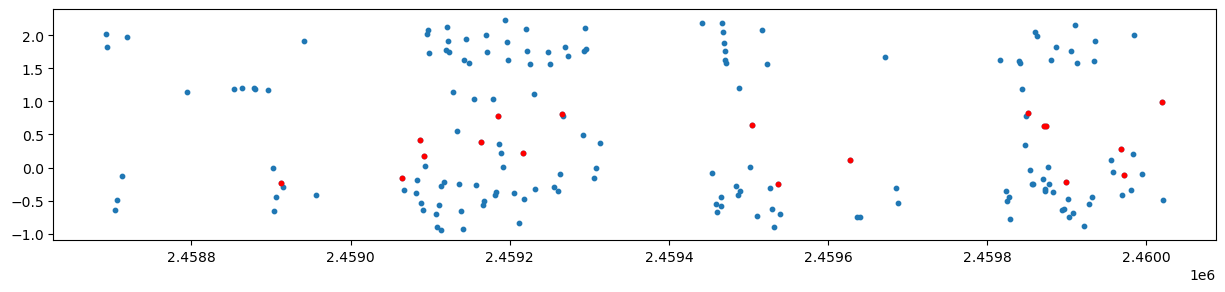

0.8715168178982537
1.1000331207229834


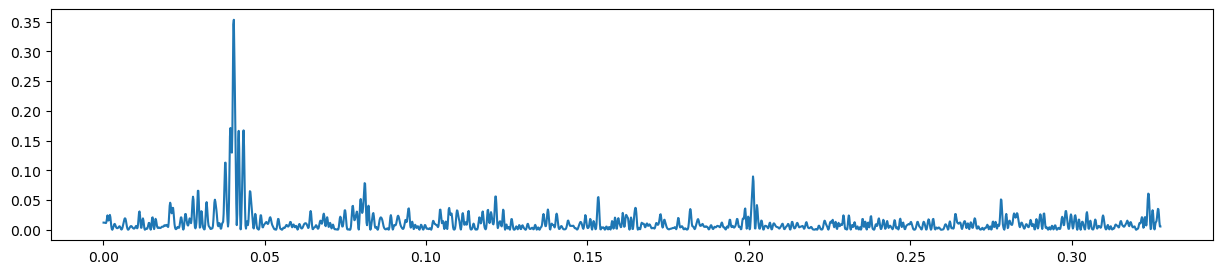

18 0.1562977179337512 -0.0002982575575820187 3.175792055706914 1.1000331207229834


roll0.8728321302596385
1.2182087023411887 0.031070229468207044 -0.03872267963142484 0.6806757834981223


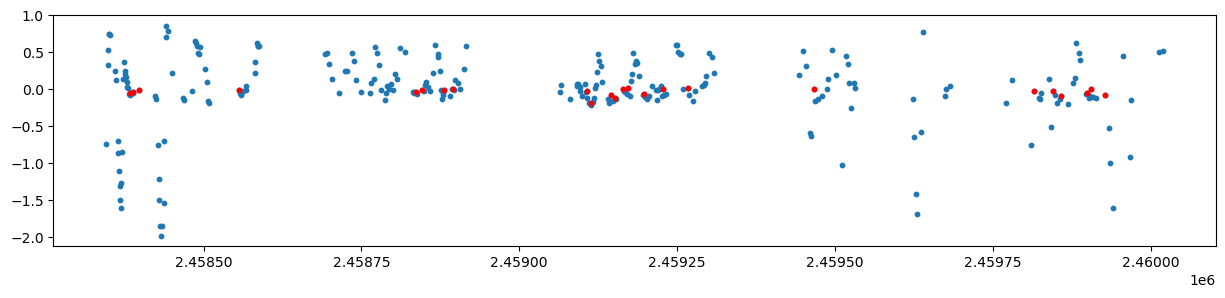

0.05775888075036306
0.0811518036865202


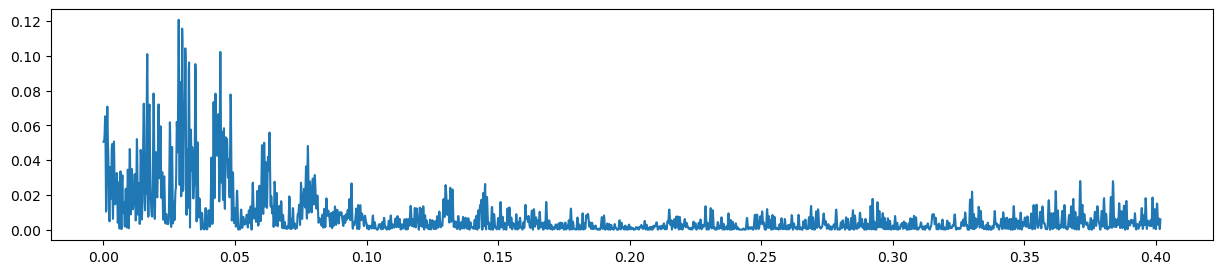

24 0.9648232085831744 -2.670592909182734e-06 2.842512467067518 0.17327664225108919


In [325]:
from scipy.signal import find_peaks, find_peaks_cwt
from scipy.stats import linregress


for obj in objlist:
    # Diplay a particaly light curve

    # Display lasair difference magnitude and apparent magnitude light curves.
    lc_test = load_lasair_lc(oid=obj, path=f'../lightcurves_dataset/lasair_{date}')
    lc_appmag_test = lasair_clean(lc_test, limit=25, magerrlim=1)
    display_lightcurve(lc_appmag_test,x='jd',y='dc_mag',errorCol=errCollasair2)

    # Split light curve by filter
    lc = lc_appmag_test.copy()

    lc.loc[lc['fid']==1, 'dc_mag'] = (lc.loc[lc['fid']==1, 'dc_mag'] - lc.loc[lc['fid']==1, 'dc_mag'].median())*(-1)
    lc.loc[lc['fid']==2, 'dc_mag'] = (lc.loc[lc['fid']==2, 'dc_mag'] - lc.loc[lc['fid']==2, 'dc_mag'].median())*(-1)
    # Convert jd to ingeter
    lc['jd'] = lc['jd'].astype(int)
    # for a given filter, if the same jd is repeated, keep the first one
    lc = lc.drop_duplicates(subset=['jd', 'fid'], keep='first')



    display_lightcurve(lc,x='jd',y='dc_mag',errorCol=errCollasair2, autorange=True)

 

    # Find peaks in light curve
    lc_g = lc[lc['fid']==1]
    lc_r = lc[lc['fid']==2]

    # Rolling standard deviation
    if len(lc_g) > 20:
        roll_std = lc['dc_mag'].rolling(10).std()
        roll_mean = lc['dc_mag'].rolling(10).mean()
        lc_max = lc['dc_mag'].max()
        lc_min = lc['dc_mag'].min()
        
        # index of minimum of rolling standard deviation
        min_roll_std = roll_std.idxmin()
        # rolling mean at the minimum of rolling standard deviation
        min_roll_std_mean = roll_mean[min_roll_std]
        # fraction of amplitude
        frac = (min_roll_std_mean-lc_min)/(lc_max-lc_min)
        print(roll_std.max(), roll_std.min(),min_roll_std_mean, frac)
    else:
        roll_std = lc['dc_mag'].rolling(len(lc_g)).std()
        print(roll_std)

    peaks, properties = find_peaks(lc_g['dc_mag'], 
                                height=(lc_g['dc_mag'].min()+0.5,lc_g['dc_mag'].min()+2), 
                                threshold=None, 
                                distance=None, 
                                prominence=(None,None), 
                                width=None, 
                                wlen=None ,
                                rel_height=0.5, 
                                plateau_size=None)


    # plot a histogram of the peaks using numpy
    import numpy as np
    import matplotlib.pyplot as plt 
    plt.figure(figsize=(15,3))
    plt.scatter(lc_g['jd'], lc_g['dc_mag'],s=10)
    plt.scatter(lc_g.iloc[peaks]['jd'], lc_g.iloc[peaks]['dc_mag'], s=10,c='r')
    plt.show()

    try:
        # Get the times of the peaks and the times of the left and right edges of the peaks
        peak_times = lc_g.iloc[peaks]['jd'].values
        times_left_bases = lc_g.iloc[properties['left_bases']]['jd'].values
        times_right_bases = lc_g.iloc[properties['right_bases']]['jd'].values
        # print(properties['prominences'])
        # print(properties['prominences']/(peak_times-times_left_bases))
        print(np.max(properties['prominences']/(peak_times-times_left_bases)))
        print(np.max(properties['prominences']/(times_right_bases-peak_times)))
    except:
        print('error')


    try:
        # Plot the lomb scargle periodogram
        from astropy.timeseries import LombScargle
        frequency, power = LombScargle(lc_g['jd'], lc_g['dc_mag']).autopower()
        plt.figure(figsize=(15,3))
        plt.plot(frequency, power)
        plt.show()
    except:
        print('error')


    # display row 33 of lc_g with just the 'dc_mag' column
    try:
        if len(peaks)==0:
            if (linregress(lc_g['jd'], lc_g['dc_mag']).pvalue < 0.05):
                print(len(peaks), 1,
                    linregress(lc_g['jd'], lc_g['dc_mag']).pvalue,
                    linregress(lc_g['jd'], lc_g['dc_mag']).slope,
                    lc_g['dc_mag'].max()-lc_g['dc_mag'].min(),
                    properties['prominences'].max())
        else:
            print(len(peaks),
                    linregress(lc_g['jd'], lc_g['dc_mag']).pvalue,
                    linregress(lc_g['jd'], lc_g['dc_mag']).slope,
                    lc_g['dc_mag'].max()-lc_g['dc_mag'].min(),
                    properties['prominences'].max())
            
    except Exception as e:
        print(e)

In [ ]:
# plot the lomb-scargle periodogram of the light curve
from astropy.timeseries import LombScargle
import matplotlib.pyplot as plt
import numpy as np
